In [114]:
#Importing Notebooks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [115]:
#Loading Dataset
d = pd.read_csv('data.csv')
d.shape
d

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775,1
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756,1
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755,1
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571,1
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362,1


In [116]:
#Selecting index rows and columns
x = d.loc[:,'MDVP:Fo(Hz)':'PPE'].values
y = d.loc[:,'status'].values

In [117]:
#Using sklearn, splitting into random train and test subsets, and stratifying
#Random state represents the seed used by the random number generator
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = \
    train_test_split(x,y,
                        test_size = 0.2,
                        stratify = y,
                        random_state = 6000)

In [118]:
#Preprocessing steps
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

In [119]:
#Constructing a pipeline
PipeLine_K = make_pipeline(StandardScaler(),PCA(n_components=2),KNeighborsClassifier())

In [120]:
#Fitting the model and transforming the data via final estimator
#Showing test accuracy
PipeLine_K.fit(x_train, y_train)
yPRED =PipeLine_K.predict(x_test)
print('TEST ACCURACY: %.3f'% PipeLine_K.score(x_test,y_test))

TEST ACCURACY: 0.872


In [121]:
#Searching for an estimator using GridSearchCV optimized by the cross validation
#Showing the best k estimator
from sklearn.grid_search import GridSearchCV
k= [4,5,6,7,8,9,10]

param_grid = [{'kneighborsclassifier__n_neighbors': k}]
gs = GridSearchCV(estimator = PipeLine_K, param_grid = param_grid, scoring ='accuracy',cv = 5)
gs = gs.fit(x_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.8717948717948718
{'kneighborsclassifier__n_neighbors': 9}


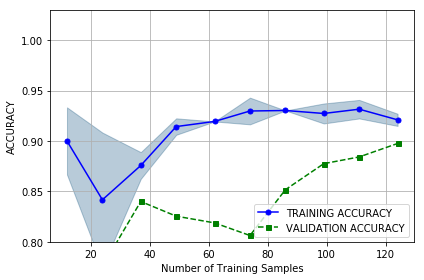

In [100]:
#Determining cross validated training and test scores using learning curve
#Computing the mean, standard deviations along specified axis
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = \
        learning_curve(estimator=PipeLine_K,
                       X=x_train,
                       y=y_train,
                       train_sizes=np.linspace(0.1,1.0,10),
                       cv=5,
                       n_jobs=1)
train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
#Plotting training accuracy and adding physical appearances
plt.plot(train_sizes, train_mean,
                 color = 'blue', marker='o',
                 markersize=5, label ='TRAINING ACCURACY')
plt.fill_between(train_sizes,
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15, color='blue')
#Plotting validation accuracy and adding physical appearances
plt.plot(train_sizes, test_mean,
                color='green',linestyle="--",
                marker='s',markersize=5,
                label= 'VALIDATION ACCURACY')
plt.fill_between(train_sizes,
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15, color='green')
#Adding axis labels and legend to the plot
plt.grid()
plt.xlabel('Number of Training Samples')
plt.ylabel('ACCURACY')
plt.legend(loc='lower right')
plt.ylim([0.8,1.03])
plt.tight_layout()
plt.show()

In [101]:
#Computing average train scores and test scores
print(np.average(train_scores))
print(np.average(test_scores))

0.909071718394674
0.8333333333333335


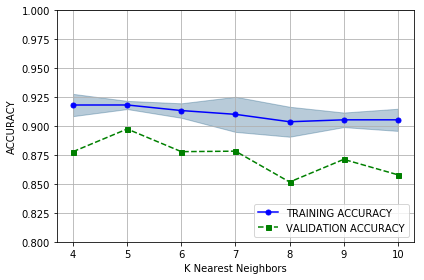

In [102]:
#Determining cross validated training and test scores using validation curve
#Computing the mean, standard deviations along specified axis
from sklearn.model_selection import validation_curve
train_scores, test_scores = validation_curve(
                    estimator=PipeLine_K,
                    X=x_train,
                    y=y_train,
                    param_name='kneighborsclassifier__n_neighbors',
                    param_range=k,
                    cv=5)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
#Plotting validation accuracy and adding physical appearances
plt.plot(k, train_mean,
                 color = 'blue', marker='o',
                 markersize=5, label ='TRAINING ACCURACY')
plt.fill_between(k, train_mean + train_std,
                train_mean - train_std, alpha=0.15, 
                 color='blue')
plt.plot(k, test_mean,
                color='green',linestyle="--",
                marker='s',markersize=5,
                label= 'VALIDATION ACCURACY')
plt.fill_between(k,
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15, color='green')
#Adding axis labels and legend to the plot
plt.grid()
plt.xlabel('K Nearest Neighbors')
plt.ylabel('ACCURACY')
plt.legend(loc='lower right')
plt.ylim([0.8,1.0])
plt.tight_layout()
plt.show()

In [103]:
#Computing average train scores and test scores
print(np.average(train_scores))
print(np.average(test_scores))

0.9106722258795991
0.8732142857142857
